<div style="background-color: #9C27B0; color: white; padding: 10px; border-radius: 5px; text-align: center;">
    <strong> RFM ANALYSIS IN THE RETAIL INDUSTRY </strong>
</div>

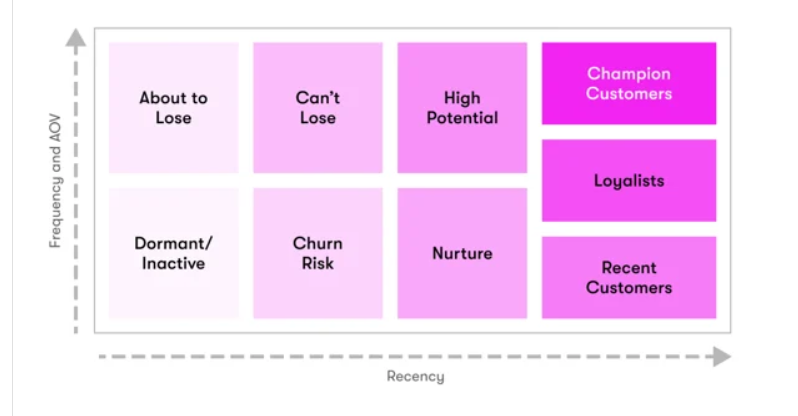

<div style="background-color: #9C27B0; color: white; padding: 10px; border-radius: 5px; text-align: center;">
    <strong> 💼 Business Problem ❓ </strong>
</div>

**An e-commerce company wants to divide its customers into segments and determine marketing strategies according to these segments**

<div style="background-color: #9C27B0; color: white; padding: 10px; border-radius: 5px; text-align: center;">
    <strong> 📊 Data Set Story 📚 </strong>
</div>

**Online Retail II, a dataset of an online retail store based in the UK. It includes sales between 01/12/2009 - 09/12/2011.**

<div style="background-color: #9C27B0; color: white; padding: 10px; border-radius: 5px; text-align: center;">
    <strong>🔢 Variables 📐 </strong>
</div>

<table style="width: 500px; border: 1px solid #ccc; border-radius: 8px; padding: 20px; font-family: sans-serif; margin: 20px auto;">
    <tr>
        <td style="font-weight: bold; color: #9932CC;">InvoiceNo:</td>
        <td style="color: #333;">Invoice number. Unique number for each transaction, i.e. invoice. If it starts with C, the canceled transaction.</td>
    </tr>
    <tr>
        <td style="font-weight: bold; color: #9932CC;">StockCode:</td>
        <td style="color: #333;">Product code. Unique number for each product.</td>
    </tr>
    <tr>
        <td style="font-weight: bold; color: #9932CC;">Description:</td>
        <td style="color: #333;">Product name.</td>
    </tr>
    <tr>
        <td style="font-weight: bold; color: #9932CC;">Quantity:</td>
        <td style="color: #333;">This is the quantity of the product. It expresses how many of the products in the invoices were sold.</td>
    </tr>
    <tr>
        <td style="font-weight: bold; color: #9932CC;">InvoiceDate:</td>
        <td style="color: #333;">Invoice date and time.</td>
    </tr>
    <tr>
        <td style="font-weight: bold; color: #9932CC;">UnitPrice:</td>
        <td style="color: #333;">Product price (in pounds sterling).</td>
    </tr>
    <tr>
        <td style="font-weight: bold; color: #9932CC;">CustomerID:</td>
        <td style="color: #333;">Unique customer number.</td>
    </tr>
    <tr>
        <td style="font-weight: bold; color: #9932CC;">Country:</td>
        <td style="color: #333;">Country name. The country where the customer lives.</td>
    </tr>
</table>

<div style="background-color: #9C27B0; color: white; padding: 10px; border-radius: 5px; text-align: center;">
    <strong> Import Required Libraries </strong>
</div>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import datetime as dt
import matplotlib.pyplot as plt
import plotly.express as px
import warnings
warnings.simplefilter(action="ignore")

<div style="background-color: #9C27B0; color: white; padding: 10px; border-radius: 5px; text-align: center;">
    <strong> Adjusting Row Column Settings </strong>
</div>

In [2]:
pd.set_option("display.max_rows", None)
pd.set_option("display.max_columns", None)
pd.set_option("display.float_format", lambda x: '%.2f' % x)

<div style="background-color: #9C27B0; color: white; padding: 10px; border-radius: 5px; text-align: center;">
    <strong> Loading the Data Set </strong>
</div>

In [3]:
df_1 = pd.read_excel("/kaggle/input/rfm-analysis/online_retail_II.xlsx", sheet_name="Year 2009-2010")
df_2 = pd.read_excel("/kaggle/input/rfm-analysis/online_retail_II.xlsx", sheet_name="Year 2010-2011")

In [4]:
df = pd.concat([df_1, df_2], ignore_index=True)

In [5]:
df.shape

(1067371, 8)

<div style="background-color: #9C27B0; color: white; padding: 10px; border-radius: 5px; text-align: center;">
    <strong> Exploratory Data Analysis </strong>
</div>

In [6]:
def check_df(dataframe, head=5):
    print('##################### Types #####################')
    print(dataframe.dtypes)
    print('##################### Head #####################')
    print(dataframe.head(head))
    print('##################### Tail #####################')
    print(dataframe.tail(head))
    print('##################### ISNULL NA #####################')
    print(dataframe.isnull().sum())
    print('##################### Quantiles #####################')
    print(dataframe.describe([0, 0.05, 0.50, 0.95, 0.99, 1]).T)

In [7]:
check_df(df)

##################### Types #####################
Invoice                object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
Price                 float64
Customer ID           float64
Country                object
dtype: object
##################### Head #####################
  Invoice StockCode                          Description  Quantity  \
0  489434     85048  15CM CHRISTMAS GLASS BALL 20 LIGHTS        12   
1  489434    79323P                   PINK CHERRY LIGHTS        12   
2  489434    79323W                  WHITE CHERRY LIGHTS        12   
3  489434     22041         RECORD FRAME 7" SINGLE SIZE         48   
4  489434     21232       STRAWBERRY CERAMIC TRINKET BOX        24   

          InvoiceDate  Price  Customer ID         Country  
0 2009-12-01 07:45:00   6.95     13085.00  United Kingdom  
1 2009-12-01 07:45:00   6.75     13085.00  United Kingdom  
2 2009-12-01 07:45:00   6.75     13085.00  Uni

<div style="background-color: #9C27B0; color: white; padding: 10px; border-radius: 5px; text-align: center;">
    <strong> Data Understanding </strong>
</div>

In [8]:
# What is the number of unique products?
df["Description"].nunique()

5698

In [9]:
# Counts how many times each unique value occurs.
df["Description"].value_counts().head()

Description
WHITE HANGING HEART T-LIGHT HOLDER    5918
REGENCY CAKESTAND 3 TIER              4412
JUMBO BAG RED RETROSPOT               3469
ASSORTED COLOUR BIRD ORNAMENT         2958
PARTY BUNTING                         2765
Name: count, dtype: int64

In [10]:
#The products are listed in descending order according to total sales amount and the top 5 products are listed.
df.groupby("Description").agg({"Quantity": "sum"}).sort_values("Quantity", ascending=False).head()

,Quantity
Description,
WORLD WAR 2 GLIDERS ASSTD DESIGNS,108545
WHITE HANGING HEART T-LIGHT HOLDER,93050
ASSORTED COLOUR BIRD ORNAMENT,81306
JUMBO BAG RED RETROSPOT,78090
BROCADE RING PURSE,70700


In [11]:
df["Invoice"].nunique()

53628

<div style="background-color: #9C27B0; color: white; padding: 10px; border-radius: 5px; text-align: center;">
    <strong> Data Preparation </strong>
</div>

In [12]:
df["TotalPrice"] = df["Quantity"] * df["Price"]

In [13]:
df = df[(df['Quantity'] > 0)]

In [14]:
df = df[~df["Invoice"].str.contains("C", na=False)]

In [15]:
df.dropna(inplace=True)

In [16]:
df.isnull().sum()

Invoice        0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
Price          0
Customer ID    0
Country        0
TotalPrice     0
dtype: int64

In [17]:
df.shape

(805620, 9)

In [18]:
df.describe().T

,count,mean,min,25%,50%,75%,max,std
Quantity,805620.00,13.31,1.00,2.00,5.00,12.00,80995.00,144.31
InvoiceDate,805620,2011-01-02 10:26:35.704326912,2009-12-01 07:45:00,2010-07-07 12:08:00,2010-12-03 15:10:00,2011-07-28 13:28:00,2011-12-09 12:50:00,NaN
Price,805620.00,3.21,0.00,1.25,1.95,3.75,10953.50,29.20
Customer ID,805620.00,15331.86,12346.00,13982.00,15271.00,16805.00,18287.00,1696.77
TotalPrice,805620.00,22.02,0.00,4.95,11.85,19.50,168469.60,224.03


<div style="background-color: #9C27B0; color: white; padding: 10px; border-radius: 5px; text-align: center;">
    <strong> Calculating RFM Metrics </strong>
</div>

<table style="width: 400px; border: 1px solid #ccc; border-radius: 8px; padding: 20px; font-family: sans-serif; margin: 20px auto;">
    <tr>
        <td style="font-weight: bold; color: #9932CC;">InvoiceDate</td>
        <td>=></td>
        <td style="color: #9932CC;">Recency</td>
    </tr>
    <tr>
        <td style="font-weight: bold; color: #9932CC;">Invoice</td>
        <td>=></td>
        <td style="color: #9932CC;">Frequency</td>
    </tr>
    <tr>
        <td style="font-weight: bold; color: #9932CC;">TotalPrice</td>
        <td>=></td>
        <td style="color: #9932CC;">Monetary</td>
    </tr>
</table>

In [19]:
df["InvoiceDate"] = pd.to_datetime(df["InvoiceDate"])

In [20]:
df["InvoiceDate"].max()

Timestamp('2011-12-09 12:50:00')

In [21]:
today = ("2011, 12, 11, 0, 0")

In [22]:
today_date = pd.to_datetime("today")

In [23]:
# Calculating RFM Metrics
RFM = df.groupby('Customer ID').agg({'InvoiceDate': lambda InvoiceDate: (today_date - InvoiceDate.max()).days,
                                     'Invoice': lambda Invoice: Invoice.nunique(),
                                     'TotalPrice': lambda TotalPrice: TotalPrice.sum()})

In [24]:
RFM.head ()

,InvoiceDate,Invoice,TotalPrice
Customer ID,,,
12346.00,5153,12,77556.46
12347.00,4829,8,5633.32
12348.00,4903,5,2019.40
12349.00,4846,4,4428.69
12350.00,5137,1,334.40


In [25]:
# Changing column names
RFM.columns = ['Recency', 'Frequency', 'Monetary']

In [26]:
RFM.describe().T

,count,mean,std,min,25%,50%,75%,max
Recency,5881.00,5028.59,209.48,4828.00,4853.00,4923.00,5207.00,5566.00
Frequency,5881.00,6.29,13.01,1.00,1.00,3.00,7.00,398.00
Monetary,5881.00,3017.08,14734.13,0.00,347.80,897.62,2304.18,608821.65


In [27]:
RFM = RFM[RFM["Monetary"] > 0]

In [28]:
RFM.shape

(5878, 3)

<div style="background-color: #9C27B0; color: white; padding: 10px; border-radius: 5px; text-align: center;">
    <strong>Calculating RFM Scores</strong>
</div>

In [29]:
# Calculating Recency_Score
RFM["Recency_Score"] = pd.qcut(RFM['Recency'].rank(method="first"),q=5, labels=[1, 2, 3, 4, 5])

In [30]:
# Calculating Frequency_Score
RFM["Frequency_Score"] = pd.qcut(RFM['Frequency'].rank(method="first"), 5, labels=[1, 2, 3, 4, 5])

In [31]:
# Calculating Monetary_Score
RFM["Monetary_Score"] = pd.qcut(RFM['Monetary'].rank(method="first"), 5, labels=[1, 2, 3, 4, 5])

In [32]:
# Creating RFM_SSCORE VARIABLE
RFM["RF_SCORE"] = (RFM['Recency_Score'].astype(str) +
                    RFM['Frequency_Score'].astype(str))

In [33]:
RFM.head ()

,Recency,Frequency,Monetary,Recency_Score,Frequency_Score,Monetary_Score,RF_SCORE
Customer ID,,,,,,,
12346.00,5153,12,77556.46,4,5,5,45
12347.00,4829,8,5633.32,1,4,5,14
12348.00,4903,5,2019.40,3,4,4,34
12349.00,4846,4,4428.69,1,3,5,13
12350.00,5137,1,334.40,4,1,2,41


<div style="background-color: #9C27B0; color: white; padding: 10px; border-radius: 5px; text-align: center;">
    <strong>Creating & Analysing RFM Segments</strong>
</div>

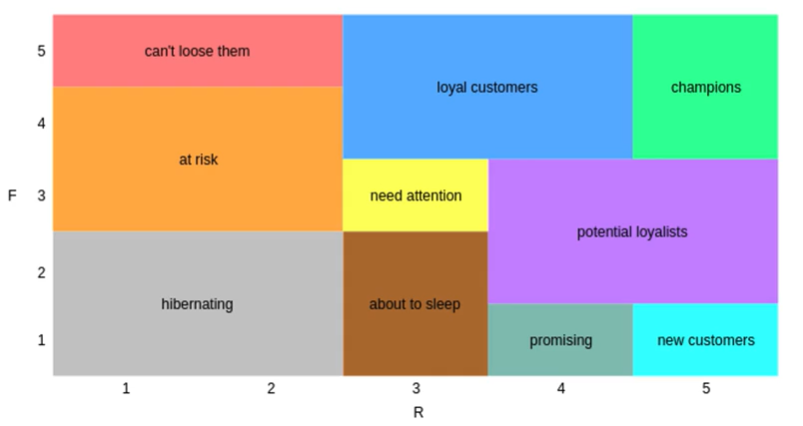
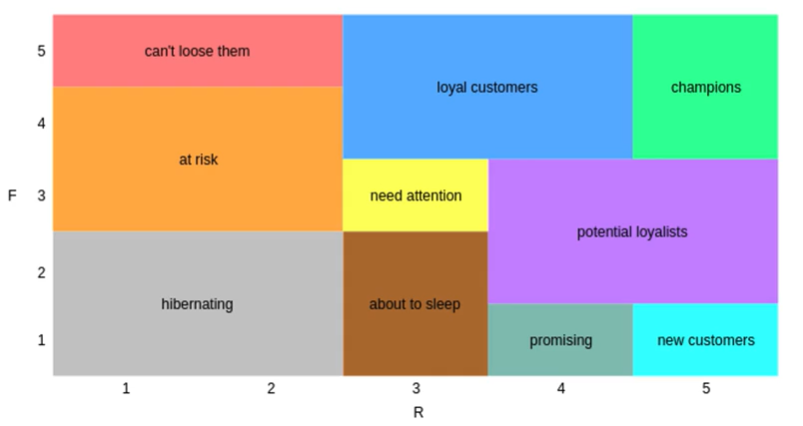

<div style="text-align: center; margin-bottom: 20px; font-size: 24px; font-weight: bold; color: #9932CC;">RFM Segments</div>
<table style="width: 700px; border: 1px solid #ccc; border-radius: 8px; padding: 20px; font-family: sans-serif; margin: 20px auto;">
    <tr>
        <td style="font-weight: bold; color: #9932CC;">Champions:</td>
        <td style="color: #333;">These are your best customers. They've made recent purchases, purchase frequently, and spend the most.</td>
    </tr>
    <tr>
        <td style="font-weight: bold; color: #9932CC;">Loyal Customers:</td>
        <td style="color: #333;">They purchase frequently and spend regularly. They're loyal to your brand.</td>
    </tr>
    <tr>
        <td style="font-weight: bold; color: #9932CC;">Potential Loyalists:</td>
        <td style="color: #333;">Recent customers who purchase regularly and spend moderately. They have the potential to become loyal customers.</td>
    </tr>
    <tr>
        <td style="font-weight: bold; color: #9932CC;">New Customers:</td>
        <td style="color: #333;">First-time buyers. Focus on onboarding them, providing a positive first experience.</td>
    </tr>
    <tr>
        <td style="font-weight: bold; color: #9932CC;">Promising:</td>
        <td style="color: #333;">Recent shoppers who haven't yet become frequent buyers. They show potential interest.</td>
    </tr>
    <tr>
        <td style="font-weight: bold; color: #9932CC;">Need Attention:</td>
        <td style="color: #333;">Past frequent shoppers who haven't made recent purchases. They might be losing interest.</td>
    </tr>
    <tr>
        <td style="font-weight: bold; color: #9932CC;">At Risk:</td>
        <td style="color: #333;">Infrequent shoppers who haven't made recent purchases. They're at risk of churning.</td>
    </tr>
    <tr>
        <td style="font-weight: bold; color: #9932CC;">Hibernating:</td>
        <td style="color: #333;">Long-time inactive customers. They might have completely forgotten about your brand.</td>
    </tr>
    <tr>
        <td style="font-weight: bold; color: #9932CC;">About To Sleep:</td>
        <td style="color: #333;">Infrequent shoppers who haven't made recent purchases. They're at risk of becoming hibernating.</td>
    </tr>
    <tr>
        <td style="font-weight: bold; color: #9932CC;">Can't Lose Them:</td>
        <td style="color: #333;">Some of your most valuable customers. They're at risk of churning.</td>
    </tr>
</table>

In [34]:
# Creation of a segment map
seg_map = {
    r'[1-2][1-2]': 'hibernating',
    r'[1-2][3-4]': 'at_Risk',
    r'[1-2]5': 'cant_loose',
    r'3[1-2]': 'about_to_sleep',
    r'33': 'need_attention',
    r'[3-4][4-5]': 'loyal_customers',
    r'41': 'promising',
    r'51': 'new_customers',
    r'[4-5][2-3]': 'potential_loyalists',
    r'5[4-5]': 'champions'
}

In [35]:
# Creating segment variable
RFM['Segment'] = RFM['RF_SCORE'].replace(seg_map, regex=True)

In [36]:
RFM.head()

,Recency,Frequency,Monetary,Recency_Score,Frequency_Score,Monetary_Score,RF_SCORE,Segment
Customer ID,,,,,,,,
12346.00,5153,12,77556.46,4,5,5,45,loyal_customers
12347.00,4829,8,5633.32,1,4,5,14,at_Risk
12348.00,4903,5,2019.40,3,4,4,34,loyal_customers
12349.00,4846,4,4428.69,1,3,5,13,at_Risk
12350.00,5137,1,334.40,4,1,2,41,promising


In [37]:
RFM[["Segment", "Recency", "Frequency", "Monetary"]].groupby("Segment").agg(["mean", "count"])

Recency       Frequency       Monetary      
                       mean count      mean count     mean count
Segment                                                         
about_to_sleep      4933.21   385      1.36   385   533.12   385
at_Risk             4851.38  1008      4.71  1008  1742.79  1008
cant_loose          4844.94   903     21.86   903 12163.47   903
champions           5320.18    89      7.54    89  3040.31    89
hibernating         4855.03   440      1.46   440   895.42   440
loyal_customers     4995.85   788      8.23   788  3318.13   788
need_attention      4940.09   268      3.15   268  1278.69   268
new_customers       5395.05   514      1.00   514   345.14   514
potential_loyalists 5245.99  1180      2.11  1180   751.12  1180
promising           5145.69   303      1.00   303   370.17   303

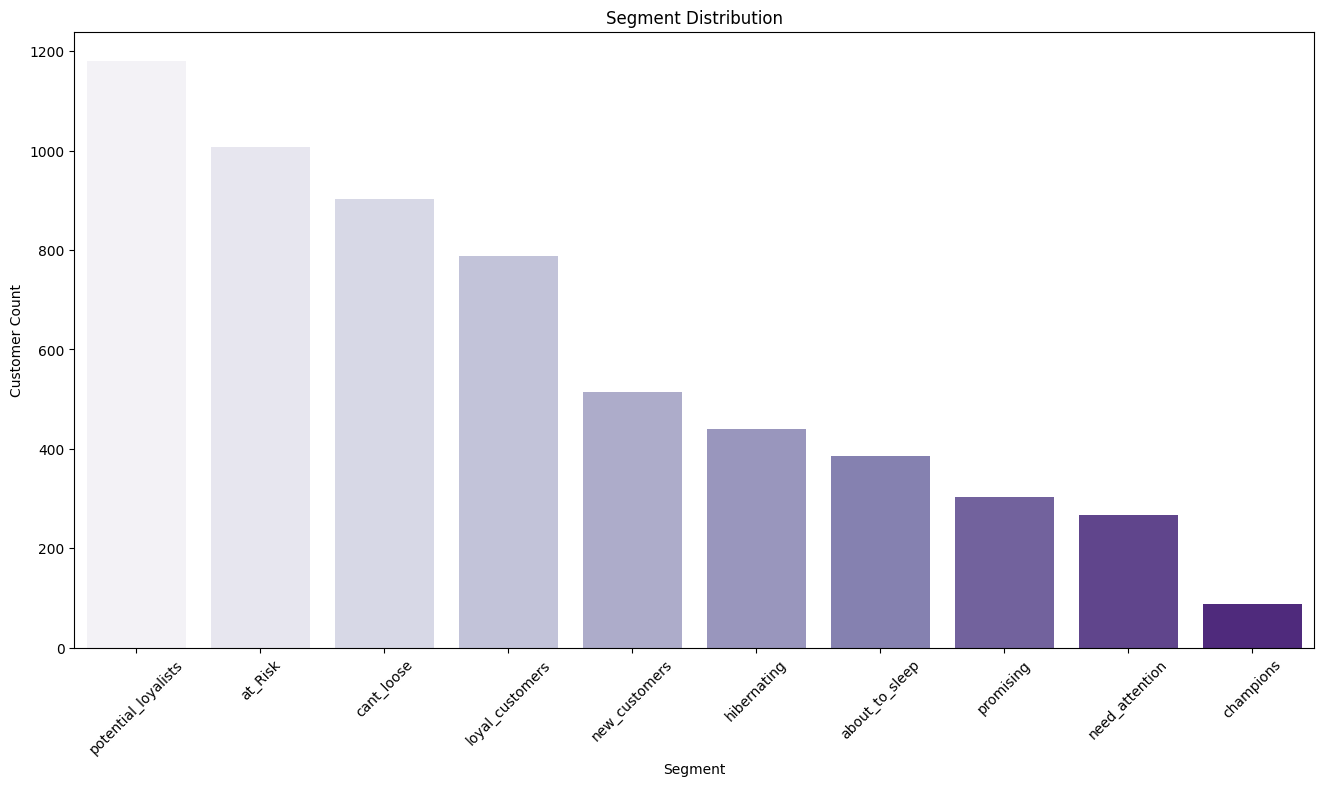

In [38]:
import seaborn as sns
import matplotlib.pyplot as plt

# Segment sayılarının hesaplanması
segment_counts = RFM['Segment'].value_counts()

# Grafiği oluşturma
plt.figure(figsize=(16, 8))
sns.barplot(x=segment_counts.index, y=segment_counts.values, palette="Purples")  # Lila tonları için "Purples" paletini kullandık

# Başlık ve etiketler
plt.title('Segment Distribution')
plt.xlabel('Segment')
plt.ylabel('Customer Count')
plt.xticks(rotation=45)

# Grafiği gösterme
plt.show()


In [39]:
# Segment Analysis
fig = px.scatter(RFM, x='Recency', y='Frequency', color='Segment', title='RFM Segments')
fig.show()

<div style="background-color: #9C27B0; color: white; padding: 10px; border-radius: 5px; text-align: center;">
    <strong>Top 10 Customers</strong>
</div>

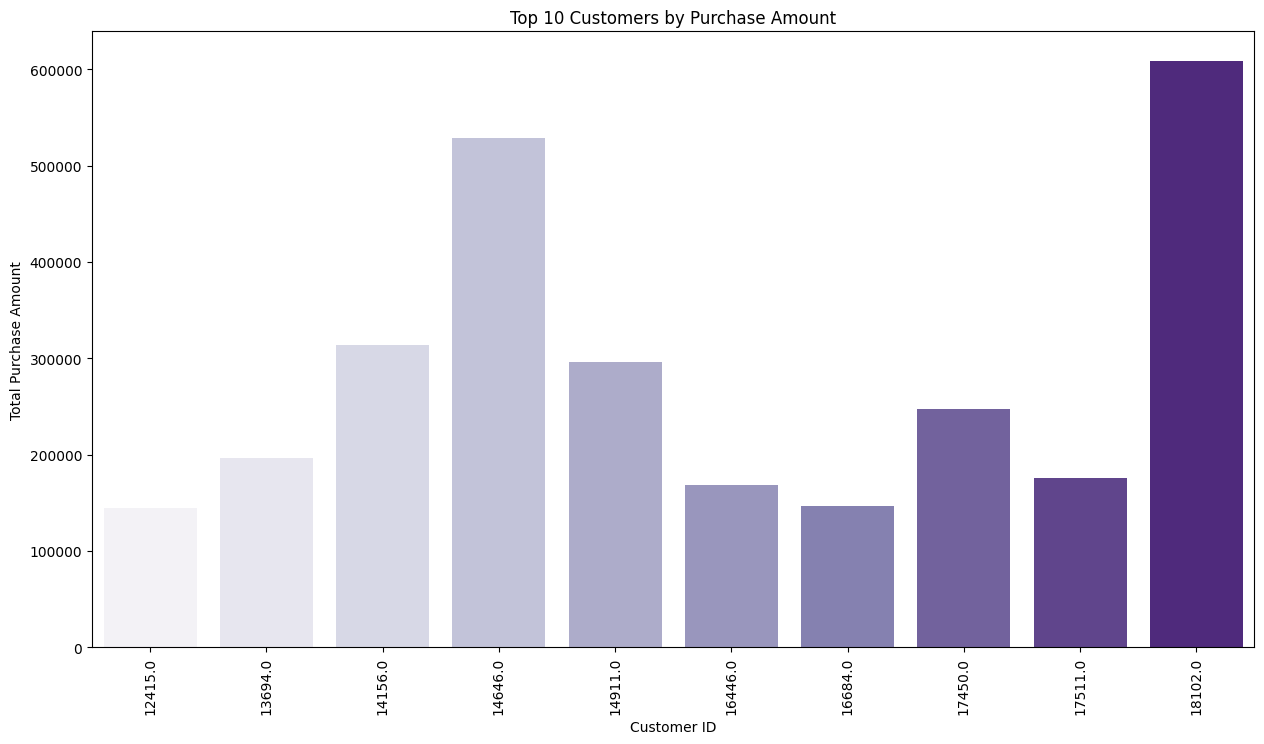

In [40]:
# Top 10 müşteriyi hesaplamak
top_customers = df.groupby('Customer ID')['TotalPrice'].sum().sort_values(ascending=False).head(10)

# Grafiği oluşturma
plt.figure(figsize=(15, 8))
sns.barplot(x=top_customers.index, y=top_customers.values, palette="Purples")  # Mor renkler için "Purples" paleti

# Başlık ve etiketler
plt.title('Top 10 Customers by Purchase Amount')
plt.xlabel('Customer ID')
plt.xticks(rotation=90)
plt.ylabel('Total Purchase Amount')

# Grafiği gösterme
plt.show()


<div style="background-color: #9C27B0; color: white; padding: 10px; border-radius: 5px; text-align: center;">
    <strong>Top 10 Most Selling Items</strong>
</div>

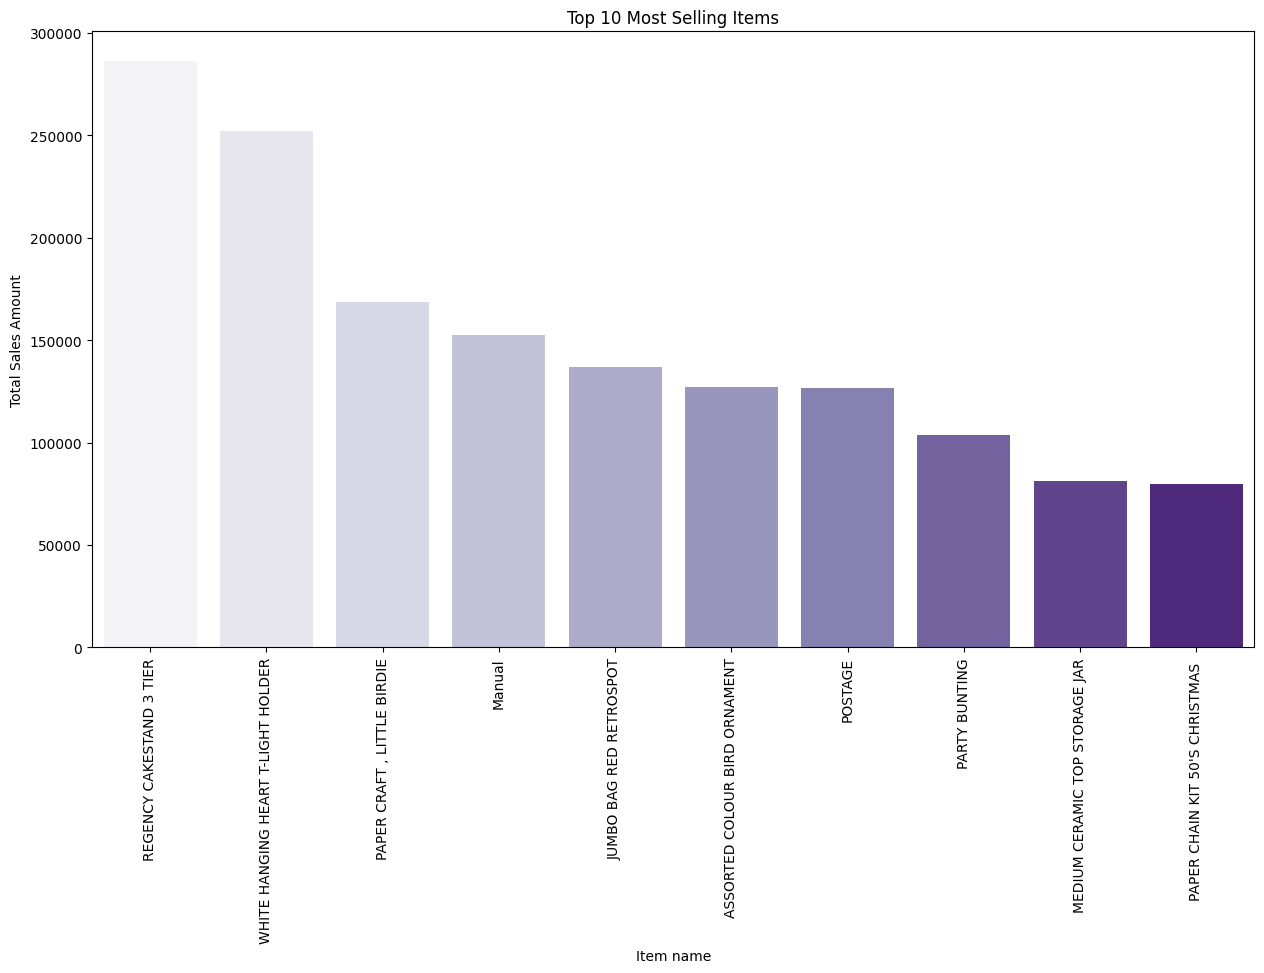

In [41]:
# En çok satılan 10 ürün
top_item = df.groupby('Description')['TotalPrice'].sum().sort_values(ascending=False).head(10)

# Grafiği oluşturma
plt.figure(figsize=(15, 8))
sns.barplot(x=top_item.index, y=top_item.values, palette="Purples")  # Mor renkler için "Purples" paleti

# Başlık ve etiketler
plt.title('Top 10 Most Selling Items')
plt.xlabel('Item name')
plt.ylabel('Total Sales Amount')
plt.xticks(rotation=90)

# Grafiği gösterme
plt.show()


<div style="background-color: #9C27B0; color: white; padding: 10px; border-radius: 5px; text-align: center;">
    <strong>Top 5 Purchasing Country</strong>
</div>

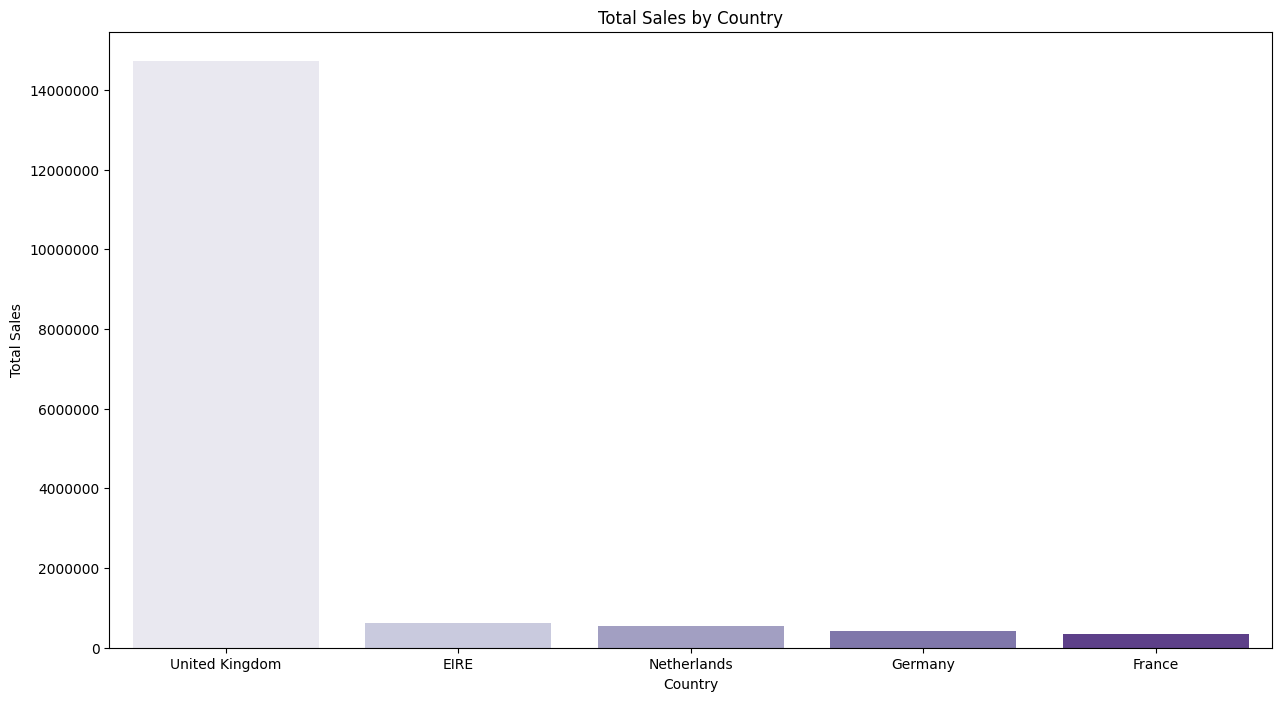

In [42]:
# Ülkelere göre toplam satışları hesaplama
sales_by_country = df.groupby('Country')['TotalPrice'].sum().reset_index()

# En yüksek 5 ülke
sales_by_country = sales_by_country.sort_values(by='TotalPrice', ascending=False).head(5)

# Grafiği oluşturma
plt.figure(figsize=(15, 8))
sns.barplot(x=sales_by_country['Country'], y=sales_by_country['TotalPrice'], palette="Purples")  # Mor renkler için "Purples" paleti

# Başlık ve etiketler
plt.xlabel('Country')
plt.ylabel('Total Sales')
plt.title('Total Sales by Country')
plt.ticklabel_format(style='plain', axis='y')

# Grafiği gösterme
plt.show()

<div style="background-color: #9C27B0; color: white; padding: 10px; border-radius: 5px; text-align: center;">
    <strong>Result</strong>
</div>

<h2 style="text-align: center; font-family: sans-serif; color: #9932CC;">Customer Segmentation - Retail Industry Strategies</h2>
<table style="width: 500px; border: 1px solid #ccc; border-radius: 8px; padding: 20px; font-family: sans-serif; margin: 20px auto;">
    <tr>
        <td style="font-weight: bold; color: #9932CC;">Champions:</td>
        <td style="color: #333;">These are your best customers. They made recent purchases, buy often, and spend the most. Strategy: Offer VIP programs, loyalty rewards, or personalized offers to maintain their loyalty.</td>
    </tr>
    <tr>
        <td style="font-weight: bold; color: #9932CC;">Loyal Customers:</td>
        <td style="color: #333;">These customers purchase frequently and spend regularly. Strategy: Keep them engaged with special deals and personalized loyalty rewards.</td>
    </tr>
    <tr>
        <td style="font-weight: bold; color: #9932CC;">Potential Loyalists:</td>
        <td style="color: #333;">These are new customers who buy regularly and moderately. Strategy: Introduce loyalty programs and exclusive offers to convert them into loyal customers.</td>
    </tr>
    <tr>
        <td style="font-weight: bold; color: #9932CC;">New Customers:</td>
        <td style="color: #333;">First-time buyers. Strategy: Provide a great onboarding experience with welcome discounts or gifts to encourage repeat purchases.</td>
    </tr>
    <tr>
        <td style="font-weight: bold; color: #9932CC;">Promising:</td>
        <td style="color: #333;">Recent customers who are not yet frequent buyers. Strategy: Send personalized offers and encourage them to shop more frequently to increase their loyalty.</td>
    </tr>
    <tr>
        <td style="font-weight: bold; color: #9932CC;">Need Attention:</td>
        <td style="color: #333;">Past frequent buyers who haven’t bought recently. Strategy: Offer special reminders, discounts, or new product updates to re-engage them.</td>
    </tr>
    <tr>
        <td style="font-weight: bold; color: #9932CC;">At Risk:</td>
        <td style="color: #333;">Infrequent buyers who haven’t purchased recently. Strategy: Implement retention campaigns with special offers to win them back.</td>
    </tr>
    <tr>
        <td style="font-weight: bold; color: #9932CC;">Hibernating:</td>
        <td style="color: #333;">Long-time inactive customers. Strategy: Use targeted email marketing or promotional campaigns to bring them back.</td>
    </tr>
    <tr>
        <td style="font-weight: bold; color: #9932CC;">About To Sleep:</td>
        <td style="color: #333;">Customers who haven’t made recent purchases but show interest. Strategy: Reach out with incentives like discounts to encourage them to shop again.</td>
    </tr>
    <tr>
        <td style="font-weight: bold; color: #9932CC;">Can't Lose Them:</td>
        <td style="color: #333;">Some of your most valuable customers who are at risk of churning. Strategy: Focus on high-touch personalized offers, VIP services, or retention campaigns to keep them engaged.</td>
    </tr>
</table>
